<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Hometasks/Base/AI_HW3_Classification_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание 3. Линейная классификация. Работа с признаками**

### **Оценивание и штрафы**

Кака всегда - каждая из задач имеет «стоимость» (указана в скобках около задачи).

В задании три части:

- Часть 1 (2.5 балла): написание логистической регрессии своими руками
- Часть 2 (5 баллов): различные методы отбора признаков
- Часть 3 (3.5 балла): обучение моделей классификации на текстах

Всего за задание можно получить 11 баллов, но:

**Балл за задание = min{ваш балл, 10}.**

In [ ]:
%pylab inline
import pandas as pd

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

Populating the interactive namespace from numpy and matplotlib


# **Часть 1. Логистическая регрессия своими руками (2.5 балла)**

## **Задание 1. Реализуйте класс логистической регрессии, обучаемой с помощью:**

**Задание 1.1 (1 балл). Градиентного спуска**

**Задание 1.2 (1 балл). Стохастического градиентного спуска**

До этого вы писали код без ограничений. Здесь же необходимо соблюдать следующие условия:

- Градиентный спуск необходимо записать в векторном виде;
- Циклы средствами python допускается использовать только для итераций градиентного спуска;

**Класс градиентного спуска должен:**
- В качестве критерия останова использовать (одновременно):
  - проверку на евклидову норму разности весов на двух соседних итерациях задаваемого параметром `tolerance`;
  - достижение максимального числа итераций, задаваемого параметром `max_iter`.
- Обладать атрибутом `loss_history`. В нём после вызова метода fit должны содержаться значения функции потерь для всех итераций, начиная с первой (до совершения первого шага по антиградиенту). Данный атрибут необходим, чтобы проследить, что оптимизационный процесс действительно сходится;
- Инициализировать веса случайным образом или нулевым вектором (на ваш выбор).

Полезно [почитать](https://scikit-learn.org/stable/developers/develop.html).

**Шаблон класса описан ниже, вам нужно реализовать каждую из заготовленных функций.**

**ВАЖНО!** Мы заполняем данный шаблон, даже если он нам не нравится. Менять структуру класса и писать по-своему запрещено - за это будут сняты баллы.

In [42]:
import numpy as np
from sklearn.base import BaseEstimator

class LogReg(BaseEstimator):
    def __init__(self, gd_type='stochastic',
                 tolerance=1e-4, max_iter=1000, w0=None, eta=1e-2):
        """
        gd_type: 'full' or 'stochastic'
        tolerance: for stopping gradient descent
        max_iter: maximum number of steps in gradient descent
        w0: np.array of shape (d) — init weights
        eta: learning rate
        """
        self.gd_type = gd_type # тип градиента
        self.tolerance = tolerance # критерий остановки спуска градиента
        self.max_iter = max_iter # max кол-во итераций
        self.w0 = w0 # изначальные веса
        self.w = None # веса обучения
        self.eta = eta # learning rate
        self.loss_history = None # массив значений loss-функции на каждой итерации

    def fit(self, X, y):
        """
        X: np.array of shape (ell, d)
        y: np.array of shape (ell)
        ---
        output: self
        """
        # история функции потерь
        self.loss_history = []
        # размерность матрицы признаков
        num_samples, num_features = X.shape
        # Инициализация весов
        if self.w0 == None:
          self.w = np.zeros(num_features)
        else:
          self.w = self.w0

        if self.gd_type == 'full':
          # Полный градиент
          for iteration in range(self.max_iter):
              # Функция потерь
              loss = self.calc_loss(X, y)
              self.loss_history.append(loss)

              # Вычисление градиента
              gradient = self.calc_gradient(X, y)

              # Обновление весов
              weights_prev = self.w.copy()
              self.w -= self.eta * gradient

              # Проверка условия остановки
              if np.linalg.norm(self.w - weights_prev) < self.tolerance:
                  break

        if self.gd_type == 'stochastic':
            # Стохастический градиент
            for iteration in range(self.max_iter):
              for i in range(num_samples):
                  # Функция потерь
                  loss = self.calc_loss(X, y)
                  self.loss_history.append(loss)

                  # Вычисление градиента
                  gradient = self.calc_gradient(X, y)

                  # Обновление весов
                  weights_prev = self.w.copy()
                  self.w -= self.eta * gradient

                  # Проверка условия остановки
                  if np.linalg.norm(self.w - weights_prev) < self.tolerance:
                      break
        return self

    def predict_proba(self, X):
        '''
        X: features vector
        ---
        output: probability of prediction
        '''
        if self.w is None:
            raise Exception('Not trained yet')
        z = np.dot(X, self.w)  # Линейная комбинация
        sig_value = 1 / (1 + np.exp(-z))
        return sig_value

    def predict(self, X):
        '''
        X: features vector
        ---
        output: class prediction
        '''
        if self.w is None:
            raise Exception('Not trained yet')
        y_pred = self.predict_proba(X)
        return np.where(y_pred >= 0.5, 1, 0)

    def calc_gradient(self, X, y):
        """
        X: np.array of shape (ell, d) (ell can be equal to 1 if stochastic)
        y: np.array of shape (ell)
        ---
        output: np.array of shape (d)
        """
        num_obj = X.shape[0]  # Количество объектов
        predictions = self.predict_proba(X)
        error = predictions - y  # Ошибка
        gradient = (1/num_obj) * np.dot(X.T, error)  # Вычисление градиента
        return gradient

    def calc_loss(self, X, y):
        """
        X: np.array of shape (ell, d)
        y: np.array of shape (ell)
        ---
        output: float
        """
        y_pred = self.predict_proba(X)
        loss = -np.mean(y * np.log(y_pred + 1e-15) + (1 - y) * np.log(1 - y_pred + 1e-15))
        # loss = self.loss(y, y_pred)
        return loss

Теперь проверим работу вашего класса на синтетических данных.

In [43]:
%pylab inline
import pandas as pd

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

Populating the interactive namespace from numpy and matplotlib


In [3]:
X, y = make_classification(
    n_samples=100000, n_features=20, n_informative=10, n_redundant=10,
    random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

**Важно:** далее предполагается, что вы используете собственную реализацию логистической регрессии.
Если с написанием класса возникли проблемы, используйте реализацию sklearn, чтобы не терять баллы за остальные задания.

## **Задание 2 (0.5 балла)**

Обучите логистическую регрессию на синтетических данных.

На тестовой части посчитайте ROC-AUC, PR-AUC. Постройте ROC и PR кривые. Проинтерпретируйте результат.

In [44]:
lgreg = LogReg(gd_type='full')
lgreg_stoh = LogReg(gd_type='stochastic')

In [45]:
lgreg.fit(X_train, y_train)

LogReg(gd_type='full')

In [46]:
lgreg_stoh.fit(X_train, y_train)

LogReg()

*Оценка*

In [15]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

In [47]:
pred_prob_full = lgreg.predict(X_test)
pred_prob_stoh = lgreg_stoh.predict(X_test)

In [48]:
# Вычисляем ROC-AUC
fpr_ful, tpr_ful, _ = roc_curve(y_test, pred_prob_full)
roc_auc_ful = roc_auc_score(y_test, pred_prob_full)
fpr_stoh, tpr_stoh, _ = roc_curve(y_test, pred_prob_stoh)
roc_auc_stoh = roc_auc_score(y_test, pred_prob_stoh)

# Вычисляем PR-AUC
precision_ful, recall_ful, _ = precision_recall_curve(y_test, pred_prob_full)
pr_auc_ful = average_precision_score(y_test, pred_prob_full)
precision_stoh, recall_stoh, _ = precision_recall_curve(y_test, pred_prob_stoh)
pr_auc_stoh = average_precision_score(y_test, pred_prob_stoh)

*full*

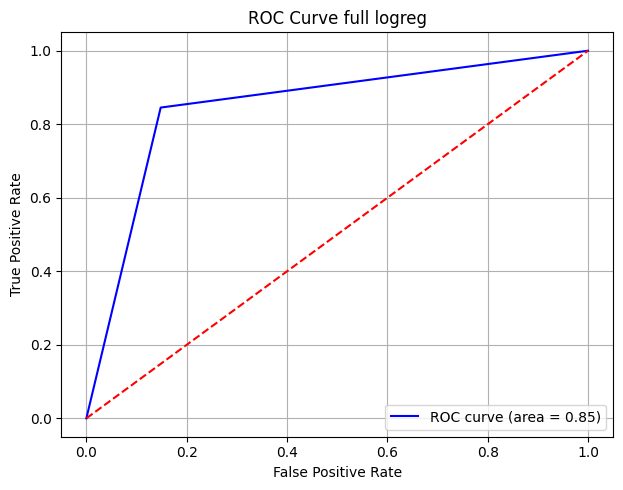

In [49]:
# Строим кривую ROC
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(fpr_ful, tpr_ful, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc_ful))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # линия случайного предсказания
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve full logreg')
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()
plt.show()

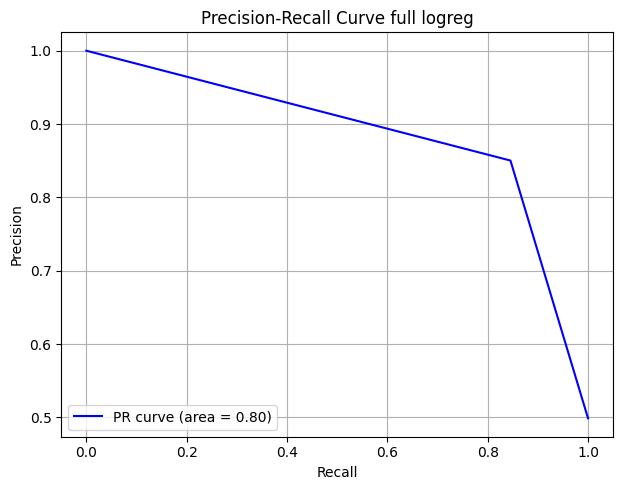

In [ ]:
# Строим кривую PR
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 2)
plt.plot(recall_ful, precision_ful, color='blue', label='PR curve (area = {:.2f})'.format(pr_auc_ful))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve full logreg')
plt.legend(loc='lower left')
plt.grid()

plt.tight_layout()
plt.show()

In [ ]:
# Выводим результаты full logreg
print(f'ROC-AUC: {roc_auc_ful:.2f}')
print(f'PR-AUC: {pr_auc_ful:.2f}')

*stohastic*

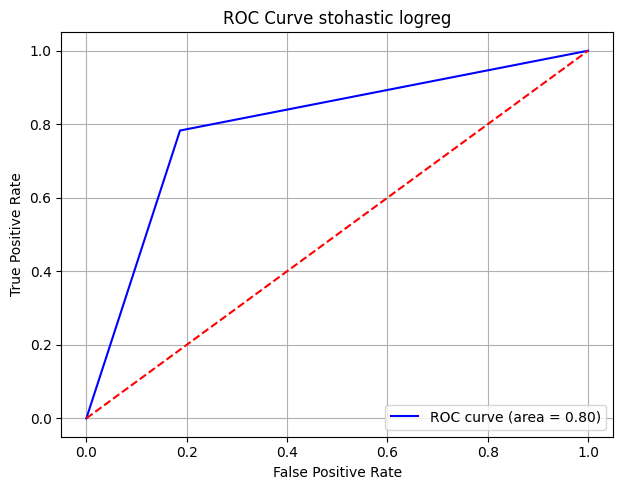

In [ ]:
# Строим кривую ROC
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(fpr_stoh, tpr_stoh, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc_stoh))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # линия случайного предсказания
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve stohastic logreg')
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()
plt.show()

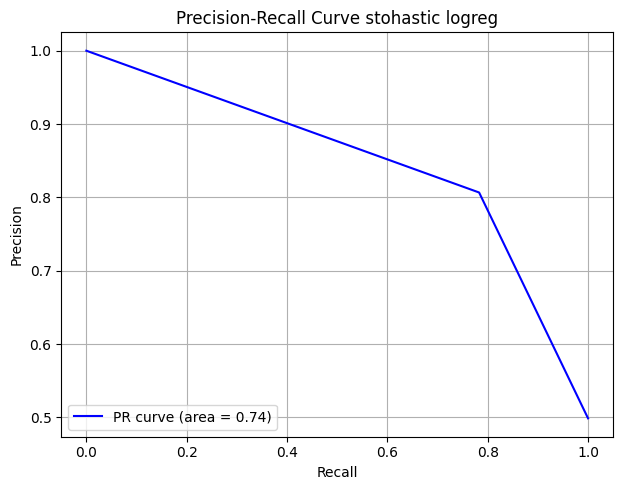

In [ ]:
# Строим кривую PR
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 2)
plt.plot(recall_stoh, precision_stoh, color='blue', label='PR curve (area = {:.2f})'.format(pr_auc_stoh))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve stohastic logreg')
plt.legend(loc='lower left')
plt.grid()

plt.tight_layout()
plt.show()

In [ ]:
# Выводим результаты stohastic logreg
print(f'ROC-AUC: {roc_auc_stoh:.2f}')
print(f'PR-AUC: {pr_auc_stoh:.2f}')

ROC-AUC: 0.80
PR-AUC: 0.74


# **Часть 2. Отбор признаков (5 баллов)**

Перейдём к еще одной важной части процесса работы с данными — отбору признаков. Он нужен в следующих случаях:
- Мы хотим сократить время вычислений;
- Мы хотим избежать переобучения;
- Мы хотим попытаться улучшить качество модели за счет уменьшения признакового пространства;

В этой части мы попробуем применить несколько подходов для отбора признаков и оценим, как они влияют на качество модели и сколько времени занимают.

**Данные** \

Будем использовать датасет [об обращениях клиентов по страховым случаям](https://www.kaggle.com/competitions/porto-seguro-safe-driver-prediction/data?select=train.csv). Скачайте его с Kaggle (файл `train.csv`).

Задача представляет собой бинарную классификациюю — воспользуется ли клиент страховкой на авто в ближайший год.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
PATH_TO_DATASET = '2_train.csv'

data = pd.read_csv(PATH_TO_DATASET, index_col=0)
data.dropna(inplace=True)
target = data.target

data = data.drop('target', axis=1)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=124)

### **Задание 3. (0.25 балла)**

Прежде всего — в данных много категориальных признаков.

- Закодируйте их с помощью one-hot кодирования. Категориальные признаки отмечены постфиксом `cat`;
- Исходные колонки с категориальными признаками удалите;
- Зафиксируйте, сколько признаков получилось;

In [ ]:
data.head()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,,,,,,,,,,,,,,,,,,,,,
7,2,2,5,1,0,0,1,0,0,0,...,9,1,5,8,0,1,1,0,0,1
9,1,1,7,0,0,0,0,1,0,0,...,3,1,1,9,0,1,1,0,1,0
13,5,4,9,1,0,0,0,1,0,0,...,4,2,7,7,0,1,1,0,1,0
16,0,1,2,0,0,1,0,0,0,0,...,2,2,4,9,0,0,0,0,0,0
17,0,2,0,1,0,1,0,0,0,0,...,3,1,1,3,0,0,0,1,1,0


In [ ]:
data.shape

(595212, 57)

#### кодирование и удаление

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
data.columns

Index(['ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat',
       'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin',
       'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin',
       'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin',
       'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03',
       'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat',
       'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat',
       'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11',
       'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01',
       'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06',
       'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11',
       'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin',
       'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin',
       'ps_calc_20_bin'],
      dtype='obj

In [ ]:
# дф с категориальными признаками
cat_df = data[['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat',
               'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat']]

# Инициализируем OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoder.set_output(transform='pandas')

# Применяем One-Hot Encoding
encoded_df = encoder.fit_transform(cat_df)

# Объединяем закодированные данные с оригинальным DataFrame, удаляя оригинальные столбцы
result_df = pd.concat([encoded_df, data], axis=1)

# Удаляем оригинальные столбцы
result_df = result_df.drop(columns=cat_df.columns)

In [ ]:
encoded_df.shape

(595212, 170)

In [ ]:
data.shape

(595212, 57)

In [ ]:
result_df

,ps_ind_02_cat_1,ps_ind_02_cat_2,ps_ind_02_cat_3,ps_ind_02_cat_4,ps_ind_04_cat_0,ps_ind_04_cat_1,ps_ind_05_cat_0,ps_ind_05_cat_1,ps_ind_05_cat_2,ps_ind_05_cat_3,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,,,,,,,,,,,,,,,,,,,,,
7,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,9,1,5,8,0,1,1,0,0,1
9,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,3,1,1,9,0,1,1,0,1,0
13,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,4,2,7,7,0,1,1,0,1,0
16,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,2,2,4,9,0,0,0,0,0,0
17,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,3,1,1,3,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1488013,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,4,1,9,6,0,1,1,0,1,1
1488016,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,4,1,3,8,1,0,1,0,1,1
1488017,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,3,2,2,6,0,0,1,0,0,0


In [ ]:
# кол-во признаков
result_df.shape[1]

213

In [ ]:
# пропуски
result_df.dropna(inplace=True)

### **Задание 4 (1 балл)**

Обучим несколько моделей, перечисленных ниже. В качестве метрики будем использовать ROC-AUC.

**Задание 4.1**

- Обучите модель логистической регрессии. Замерьте скорость обучения модели
- Обучите метод опорных векторов
- Обучите метод k ближайших соседей
- Посчитайте качество моделей (ROC-AUC) на тестовой выборке

**Задание 4.2**

Для каждой из трех моделей (логистическая регрессия, SVM, KNN) подберите при помощи GridSearchCV на тренировочных данных оптимальные гиперпараметры:
- Для логистической регрессии: C, class_weight
- Для SVM: C, kernel, class_weight
- Для KNN: n_neighbors, weights

Затем посчитайте качество моделей на тестовой выборке.

В заданиях 4.1 и 4.2 замеряйте время обучения моделей.


Подготовка

In [ ]:
# сэмпл, так как вычислительной мощности не хватает
result_df_smpl = result_df.sample(n=5000, random_state=1234)
target_smpl = target.sample(n=5000, random_state=1234)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(result_df_smpl, target_smpl, test_size=0.2, random_state=124)

#### 4.1

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
import time

лог регрессия

In [ ]:
# лог регрессия
lgreg = LogisticRegression(max_iter=200)

In [ ]:
# Замер времени предсказания
start_time = time.time()

# Обучение модели
lgreg.fit(X_train, y_train)
end_time = time.time()

# Расчет времени предсказания
prediction_time = end_time - start_time

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print(f"Время предсказания: {round(prediction_time,1)} секунд")

Время предсказания: 0.3 секунд


In [ ]:
# Прогнозирование на тестовой выборке
y_pred_lgreg = lgreg.predict(X_test)

опорные векторы

*линейный*

In [ ]:
svc = svm.SVC(kernel='rbf') # Можно использовать 'linear', 'poly', 'rbf', 'sigmoid' и т.д.

In [ ]:
# Замер времени предсказания
start_time = time.time()

# Обучение модели
svc.fit(X_train, y_train)
end_time = time.time()

# Расчет времени предсказания
prediction_time = end_time - start_time

In [ ]:
print(f"Время предсказания: {round(prediction_time,1)} секунд")

Время предсказания: 0.6 секунд


In [ ]:
y_pred_svc_rbf = svc.predict(X_test)

*полиномиальный*

In [ ]:
svc_poly = svm.SVC(kernel='poly') # Можно использовать 'linear', 'poly', 'rbf', 'sigmoid' и т.д.

In [ ]:
# Замер времени предсказания
start_time = time.time()

# Обучение модели
svc_poly.fit(X_train, y_train)
end_time = time.time()

# Расчет времени предсказания
prediction_time = end_time - start_time

In [ ]:
print(f"Время предсказания: {round(prediction_time,1)} секунд")

Время предсказания: 0.7 секунд


In [ ]:
y_pred_svc_poly = svc_poly.predict(X_test)

k ближайших соседей (желательно в трезвом состоянии xD)

In [ ]:
k = 5  # количество ближайших соседей
k_neigh = KNeighborsClassifier(n_neighbors=k)

In [ ]:
# Замер времени предсказания
start_time = time.time()

# Обучение модели
k_neigh.fit(X_train, y_train)
end_time = time.time()

# Расчет времени предсказания
prediction_time = end_time - start_time

In [ ]:
print(f"Время предсказания: {round(prediction_time,1)} секунд")

Время предсказания: 0.1 секунд


In [ ]:
y_pred_kneigh = k_neigh.predict(X_test)

качество моделей

логистическая регрессия

In [ ]:
roc_auc_score(y_test, y_pred_lgreg)

0.5

svc rbf

In [ ]:
roc_auc_score(y_test, y_pred_svc_rbf)

0.5

svc poly

In [ ]:
roc_auc_score(y_test, y_pred_svc_poly)

0.5

k ближ соседей

In [ ]:
roc_auc_score(y_test, y_pred_kneigh)

0.5000553993329448

#### 4.2

In [ ]:
from sklearn.model_selection import GridSearchCV

логрегрессия

In [ ]:
log_reg_param_grid = {
    'C': [1,3,5,7,10],
    'class_weight': [None, 'balanced']
}

log_reg_grid = GridSearchCV(lgreg, log_reg_param_grid, cv=5, scoring='accuracy')

In [ ]:
# Замер времени предсказания
start_time = time.time()

# Обучение модели
log_reg_grid.fit(X_train, y_train)
end_time = time.time()

# Расчет времени предсказания
prediction_time = end_time - start_time
print(f"Время предсказания: {round(prediction_time,1)} секунд")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Время предсказания: 16.7 секунд


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
best_log_reg = log_reg_grid.best_estimator_
log_reg_pred = best_log_reg.predict(X_test)

In [ ]:
best_log_reg

LogisticRegression(C=1, max_iter=200)

In [ ]:
roc_auc_score(y_test, log_reg_pred)

0.5

опорные векторы

In [ ]:
svc = svm.SVC()

svm_param_grid = {
    'C': [1,5,9],
    'kernel': ['linear', 'poly', 'rbf'],
    'class_weight': [None, 'balanced']
}

svm_grid = GridSearchCV(svc, svm_param_grid, cv=5, scoring='accuracy')

In [ ]:
# Замер времени предсказания
start_time = time.time()

# Обучение модели
svm_grid.fit(X_train, y_train)
end_time = time.time()

# Расчет времени предсказания
prediction_time = end_time - start_time
print(f"Время предсказания: {round(prediction_time,1)} секунд")

Время предсказания: 1295.6 секунд


In [ ]:
best_svm = svm_grid.best_estimator_
svm_pred = best_svm.predict(X_test)

In [ ]:
roc_auc_score(y_test, log_reg_pred)

0.5

k соседей

In [ ]:
knn_param_grid = {
    'n_neighbors': range(1, 21),
    'weights': ['uniform', 'distance']
}

knn_grid = GridSearchCV(k_neigh, knn_param_grid, cv=5, scoring='accuracy')

In [ ]:
# Замер времени предсказания
start_time = time.time()

# Обучение модели
knn_grid.fit(X_train, y_train)
end_time = time.time()

# Расчет времени предсказания
prediction_time = end_time - start_time
print(f"Время предсказания: {round(prediction_time,1)} секунд")

Время предсказания: 21.2 секунд


In [ ]:
best_knn = knn_grid.best_estimator_
knn_pred = best_knn.predict(X_test)

In [ ]:
roc_auc_score(y_test, log_reg_pred)

0.5

### **Встроенные методы**

**Заметим, что:**

- Время обучения моделей отличается между собой.
- Несмотря на то, что признаков много, качество модели не очень хорошее.


Попробуем решить проблемы — улучшить качество и при этом сократить пространство признаков и, соответственно, время обучения моделей.



**Отбор признаков встроеным методом.**

Начнём с отбора признаков с помощью линейной модели. Делая это, мы используем факт:
> веса линейной модели отражают  вклад каждого признака в предсказание модели, а значит, модуль этого вклада можно интерпретировать как важность признаков.

Такой метод отбора называются встроенным в модель методом, так как он заложен в особенности модели.

**Важно:** применение этого подхода требует машстабирования признаков (подумайте, почему). Вы можете использовать приведение к стандартному нормальному распределению (`StandardScaler`) с параметрами или MinMax преобразование (`MinMaxScaler`).

### **Задание 5 (0.75 балла)**

Оставьте 150 признаков с наибольшими по модулю весами после обучения логистической регрессии.

- Замерьте скорость такого отбора признаков. (0.2 балла)

- Обучите логистическую регрессию на исходных признаках. Из них оставьте 150 лучших (с наибольшими по модулю весами).
- Масштабируйте данные — все, кроме категориальных и бинарных признаков. Зафиксируйте, сколько признаков пришлось масштабировать. (0.25 балла)
- Обучите новую модель на 150 признаках и оцените её качество. (0.15 балла)




*топ 150 по logreg на исходных данных*

In [ ]:
# Замер времени предсказания
start_time = time.time()

# лог регрессия
lgreg_best_param = LogisticRegression(C=1, max_iter=200)
lgreg_best_param.fit(X_train, y_train)

# Получите веса признаков
weights = lgreg_best_param.coef_[0]

# Создайте DataFrame для хранения признаков и их соответствующих весов
weights_df = pd.DataFrame({'feature': result_df.columns, 'weight': weights})

# Отсортируйте признаки по абсолютному значению весов и выберите 150 лучших
top_features = weights_df.reindex(weights_df['weight'].abs().nlargest(150).index)

# Выводим результаты
print(top_features)

# Расчет времени предсказания
prediction_time = end_time - start_time
print(f"Время отбора признаков: {round(prediction_time,1)} секунд")

              feature    weight
140  ps_car_11_cat_75  1.215649
30    ps_car_04_cat_2  1.117963
19    ps_car_01_cat_6 -1.114586
136  ps_car_11_cat_71  1.027644
72    ps_car_11_cat_7  0.933598
..                ...       ...
62    ps_car_09_cat_2 -0.160853
20    ps_car_01_cat_7 -0.152139
24   ps_car_01_cat_11 -0.146108
128  ps_car_11_cat_63 -0.140926
27    ps_car_03_cat_0  0.140402

[150 rows x 2 columns]
Время отбора признаков: -58.9 секунд


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


*масштабирование*

In [ ]:
# какие численные признаки остались после их сокращения?
top_features.feature.values


array(['ps_car_11_cat_75', 'ps_car_04_cat_2', 'ps_car_01_cat_6',
       'ps_car_11_cat_71', 'ps_car_11_cat_7', 'ps_car_04_cat_8',
       'ps_car_01_cat_1', 'ps_car_11_cat_5', 'ps_car_06_cat_14',
       'ps_car_11_cat_80', 'ps_car_11_cat_50', 'ps_car_11_cat_10',
       'ps_car_11_cat_94', 'ps_car_11_cat_42', 'ps_car_06_cat_4',
       'ps_ind_05_cat_5', 'ps_car_11_cat_32', 'ps_car_06_cat_12',
       'ps_car_11_cat_89', 'ps_ind_05_cat_2', 'ps_car_11_cat_85',
       'ps_car_11_cat_27', 'ps_car_11_cat_11', 'ps_car_11_cat_31',
       'ps_car_11_cat_44', 'ps_car_04_cat_1', 'ps_car_11_cat_55',
       'ps_car_11_cat_78', 'ps_car_11_cat_17', 'ps_car_11_cat_16',
       'ps_car_11_cat_24', 'ps_car_11_cat_59', 'ps_car_11_cat_56',
       'ps_car_11_cat_28', 'ps_car_11_cat_87', 'ps_car_11_cat_36',
       'ps_car_06_cat_16', 'ps_car_11_cat_95', 'ps_car_11_cat_58',
       'ps_car_02_cat_1', 'ps_car_11_cat_92', 'ps_car_11_cat_6',
       'ps_ind_17_bin', 'ps_car_11_cat_37', 'ps_car_11_cat_2',
       'ps_

In [ ]:
# Отбираем названия столбцов, не содержащие 'cat' и 'bin'
filtered_features = [s for s in top_features.feature.values if 'cat' not in s and 'bin' not in s]

In [ ]:
filtered_features

['ps_car_12',
 'ps_reg_01',
 'ps_car_14',
 'ps_ind_14',
 'ps_reg_03',
 'ps_calc_01',
 'ps_reg_02',
 'ps_car_13']

In [ ]:
len(filtered_features)
# масштабировать 8 признаков

8

In [ ]:
df_features_scaled = result_df_smpl[top_features.feature.values]

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
df_features_scaled.head()

,ps_car_11_cat_75,ps_car_04_cat_2,ps_car_01_cat_6,ps_car_11_cat_71,ps_car_11_cat_7,ps_car_04_cat_8,ps_car_01_cat_1,ps_car_11_cat_5,ps_car_06_cat_14,ps_car_11_cat_80,...,ps_reg_02,ps_car_11_cat_88,ps_car_04_cat_9,ps_car_13,ps_car_11_cat_86,ps_car_09_cat_2,ps_car_01_cat_7,ps_car_01_cat_11,ps_car_11_cat_63,ps_car_03_cat_0
id,,,,,,,,,,,,,,,,,,,,,
334243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.794155,0.0,1.0,0.0,0.0,0.0,1.0
269501,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.787311,0.0,0.0,0.0,0.0,0.0,0.0
225043,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.9,0.0,0.0,0.699587,0.0,1.0,0.0,1.0,0.0,0.0
529765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.479691,0.0,1.0,1.0,0.0,0.0,1.0
102112,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.629869,0.0,1.0,0.0,1.0,0.0,1.0


In [ ]:
scaler = StandardScaler()

df_features_scaled[filtered_features] = scaler.fit_transform(df_features_scaled[filtered_features])

<ipython-input-36-4fc56d1029a9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features_scaled[filtered_features] = scaler.fit_transform(df_features_scaled[filtered_features])


In [ ]:
df_features_scaled.head()

,ps_car_11_cat_75,ps_car_04_cat_2,ps_car_01_cat_6,ps_car_11_cat_71,ps_car_11_cat_7,ps_car_04_cat_8,ps_car_01_cat_1,ps_car_11_cat_5,ps_car_06_cat_14,ps_car_11_cat_80,...,ps_reg_02,ps_car_11_cat_88,ps_car_04_cat_9,ps_car_13,ps_car_11_cat_86,ps_car_09_cat_2,ps_car_01_cat_7,ps_car_01_cat_11,ps_car_11_cat_63,ps_car_03_cat_0
id,,,,,,,,,,,,,,,,,,,,,
334243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.391330,0.0,0.0,-0.061673,0.0,1.0,0.0,0.0,0.0,1.0
269501,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.090440,0.0,0.0,-0.092615,0.0,0.0,0.0,0.0,0.0,0.0
225043,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.143153,0.0,0.0,-0.489249,0.0,1.0,0.0,1.0,0.0,0.0
529765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.090440,0.0,0.0,-1.483477,0.0,1.0,1.0,0.0,0.0,1.0
102112,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.090440,0.0,0.0,-0.804465,0.0,1.0,0.0,1.0,0.0,1.0


*Обучение на датасете с масштабированными признаками*

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_features_scaled, target_smpl, test_size=0.4, random_state=777)

In [ ]:
# logreg
# Замер времени предсказания
start_time = time.time()

log_reg_grid.fit(X_train, y_train)

end_time = time.time()
# Расчет времени предсказания
prediction_time = end_time - start_time
print(f"Обучение заняло: {round(prediction_time,1)} секунд")

Обучение заняло: 11.1 секунд


In [ ]:
lgreg_predict = log_reg_grid.predict(X_test)

In [ ]:
roc_auc_score(y_test, lgreg_predict)

0.5

In [ ]:
# svc
# Замер времени предсказания
start_time = time.time()

svm_grid.fit(X_train, y_train)

end_time = time.time()
# Расчет времени предсказания
prediction_time = end_time - start_time
print(f"Обучение заняло: {round(prediction_time,1)} секунд")

Обучение заняло: 43.9 секунд


In [ ]:
svc_predict = svm_grid.predict(X_test)

In [ ]:
roc_auc_score(y_test, svc_predict)

0.5

In [ ]:
# knn
# Замер времени предсказания
start_time = time.time()

knn_grid.fit(X_train, y_train)

end_time = time.time()
# Расчет времени предсказания
prediction_time = end_time - start_time
print(f"Обучение заняло: {round(prediction_time,1)} секунд")

Обучение заняло: 12.4 секунд


In [ ]:
knn_predict = knn_grid.predict(X_test)

In [ ]:
roc_auc_score(y_test, knn_predict)

0.5

*качеству все равно на наши попытки 😀*

### **Бонус (0.25 балла)**

Попробуйте реализовать итеративный отбор признаков, а именно:

1) Сначала отобрать около 200 признаков (действуя как в задании выше)

2) Потом повторить процедуру для отбора 150 признаков из 200 (снова действуя как в задании выше)

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

### **Задание 6 (0.5 балла)**

Также можно задать отбор признаков, используя другия свойства модели. Вспомним, что L1-регуляризация тоже умеет отбирать признаки.

- Обучите модель на исходных данных. Подберите по сетке (GridSearch) наилучшее значение коэффициента регуляризации C. (0.1 балла)

- Посмотрите сколько признаков отобрала модель с найденным оптимальным C?
  - Сначала посчитайте только число ненулевых весов
  - Затем посчитайте число весов, которые после округления до двух знаков после запятой не равны нулю (0.25 балла)

Удалось ли отобрать 150 признаков за 1 шаг? (0.05 балла)

In [ ]:
lgreg_best_param = LogisticRegression(solver = 'liblinear', C=1, penalty='l1', max_iter=200)
lgreg_best_param.fit(X_train, y_train)

LogisticRegression(C=1, max_iter=200, penalty='l1', solver='liblinear')

In [ ]:
coefs = lgreg_best_param.coef_

In [ ]:
# кол-во ненулевых коэффициентов
len(coefs[coefs > 0])

87

In [ ]:
round_coefs = np.round(coefs, 2)

In [ ]:
# кол-во ненулевых коэффициентов после округления
len(round_coefs[round_coefs > 0])

79

### **Методы фильтрации**

Также можно отбирать признаки, применяя методы математической статистики. А именно, в нашем случае, через подсчёт некоторой функции для каждого признака. На основании значений этой функции (она называется *статистикой*) мы можем оставлять наиболее важные признаки. Методы этого семейства называют *фильтрационными* или *filter methods*.

**Что проверяем:**

Равны ли математические ожидания (то есть выборочные средние) распределений признака для двух разных классов? Если они различаются, значит и сами распределения разные. И можно сделать вывод, что по этому признаку модель сможет отличить один класс от другого. А если распределения неотличимы и значение статистики маленькое, то и признак бесполезен.


Для проверки будем считать t-статистику:

$$t(x) = \frac{|\mu_+ - \mu_-|}{\sqrt{\frac{n_+ s^2_+ + n_- s^2_-}{n_+ + n_-}}},$$

где $\mu$, $s$, $n$ соответственно среднее, среднеквадратичное отклонение и количество объектов каждого из классов.

**Примечание:** Если у вас была данная тема на курсе по математической статистике, то вы без труда узнаете статистику гипотезы о разности средних при неизвестных дисперсиях.

Хотя мы и не используем статистическое тестирование явно, предпосылки о том, что наблюдения независимы, одинаково распределены и $n$ велико, должны соблюдаться, иначе статистика не имеет смысла. Но у нас большая выборка, поэтому они выполняются.

Для отбора признаков по t-статистике мы возьмём признаки с наибольшим значением статистики.

### **Задание 7 (1 балла)**

-  Масштабируйте признаки исходного датасета — все, кроме категориальных и бинарных.
- Выделите непрерывные признаки (те, которые масштабировали)
- Посчитайте значения t-статистики. Оставьте ***половину*** признаков с наибольшим значением статистики, объедините их с категориальными и бинарными.
- Обучите модель логистической регрессии и замерьте качество.

Не забудьте замерить скорость отбора признаков в этом случаев.

In [ ]:
# Отбираем названия столбцов, не содержащие 'cat' и 'bin'
num_features = [s for s in data.columns if 'cat' not in s and 'bin' not in s]
num_features

['ps_ind_01',
 'ps_ind_03',
 'ps_ind_14',
 'ps_ind_15',
 'ps_reg_01',
 'ps_reg_02',
 'ps_reg_03',
 'ps_car_11',
 'ps_car_12',
 'ps_car_13',
 'ps_car_14',
 'ps_car_15',
 'ps_calc_01',
 'ps_calc_02',
 'ps_calc_03',
 'ps_calc_04',
 'ps_calc_05',
 'ps_calc_06',
 'ps_calc_07',
 'ps_calc_08',
 'ps_calc_09',
 'ps_calc_10',
 'ps_calc_11',
 'ps_calc_12',
 'ps_calc_13',
 'ps_calc_14']

In [ ]:
data.shape

(264530, 57)

In [ ]:
df_full = pd.read_csv(PATH_TO_DATASET, index_col=0)

*масштабируем*

In [ ]:
scal = StandardScaler()

In [ ]:
df_full[num_features] = scal.fit_transform(df_full[num_features])

*Отбираем признаки*

In [ ]:
df_target_0 = df_full.query('target == 0')
df_target_1 = df_full.query('target == 1')

In [ ]:
from scipy import stats

In [ ]:
# dict for dataframe with features and stat values
feature_list = []
stat_list = []

In [ ]:
# Замер времени предсказания
start_time = time.time()

for feature in data[num_features].columns:
  target_0 = df_target_0[feature].values
  target_1 = df_target_1[feature].values

  t_stat, _ = stats.ttest_ind(target_0, target_1)

  feature_list.append(feature)
  stat_list.append(abs(t_stat))

end_time = time.time()
# Расчет времени предсказания
prediction_time = end_time - start_time
print(f"Отбор признаков занял: {round(prediction_time,1)} секунд")

Отбор признаков занял: 0.4 секунд


In [ ]:
stats_df = pd.DataFrame({'feature': feature_list,
                       't_stat': stat_list}
             )
stats_df.sort_values('t_stat', ascending=False)

,feature,t_stat
35,ps_car_13,41.643362
9,ps_car_13,41.643362
8,ps_car_12,29.948835
34,ps_car_12,29.948835
5,ps_reg_02,26.864437
31,ps_reg_02,26.864437
6,ps_reg_03,23.841504
32,ps_reg_03,23.841504
37,ps_car_15,21.353441
11,ps_car_15,21.353441


In [ ]:
stats_df.shape[0] / 2

13.0

In [ ]:
# половина самых ненужных признаков от всех числовых признаков, чтобы удалить из основного дф
unimportant_feat = stats_df.sort_values('t_stat', ascending=False) \
                         .tail(13) \
                         ['feature'] \
                         .values

In [ ]:
unimportant_feat

array(['ps_calc_14', 'ps_calc_02', 'ps_car_11', 'ps_calc_12',
       'ps_calc_10', 'ps_calc_08', 'ps_calc_05', 'ps_calc_09',
       'ps_calc_13', 'ps_calc_11', 'ps_calc_07', 'ps_calc_06',
       'ps_calc_04'], dtype=object)

*Исключение признаков*

In [ ]:
df_full_imp_feat = df_full.drop(columns=unimportant_feat)

In [ ]:
df_full_imp_feat.shape

(595212, 45)

*Обучение log reg*

In [ ]:
df_full_imp_feat.columns

Index(['target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat',
       'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin',
       'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin',
       'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin',
       'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03',
       'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat',
       'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat',
       'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_12',
       'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01', 'ps_calc_03',
       'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
       'ps_calc_19_bin', 'ps_calc_20_bin'],
      dtype='object')

In [ ]:
X = df_full_imp_feat.drop(columns = ['target'])
y = df_full_imp_feat['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=42)

In [ ]:
log_reg_grid.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=200),
             param_grid={'C': [1, 3, 5, 7, 10],
                         'class_weight': [None, 'balanced']},
             scoring='accuracy')

In [ ]:
lgreg_predict = log_reg_grid.predict(X_test)

In [ ]:
roc_auc_score(y_test, lgreg_predict)

0.5

качество никак не хочет расти

### **Методы-обёртки**

### **Задание 8 (бонус, 1 балл)**


Заключительный из рассматриваемых нами методов работает следующим образом: мы исключаем по очереди каждый из признаков и смотрим, как это влияет на качество модели, обученной без удаленного признака. Удаляем признаки таким жадным способом.

Заметим, что нельзя оценивать качество по тестовой выборке, иначе мы можем переобучиться, как, например, при настройке гиперпараметров. Разделите выборку на 2 части, на одной из них обучайте модель без одного из признаков,  на второй части оценивайте качество. Исходную тестовую выборку стоит использовать только на финальной оценке качества.

Сделайте одну итерацию и прикиньте, сколько времени займёт такой отбор признаков. Кажется, что чересчур много. Давайте возьмём маленький сэмпл данных (например, в 10 тысяч объектов), что сильно уменьшит время итерации. Теперь это долго, но уже приемлимо.

Если это всё ещё долго для вашего комьютера, можете попробовать брать не по одному признаку, а сразу по пять (и удалять сразу тоже по 5). Для этого перед каждой итерацией удаления делите заново все признаки на группы по 5 штук.

Снова оставьте только 150 признаков и оцените качество на тестовой выборке. Сколько времени занял такой отбор признаков?

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Опционально (это не оценивается) можете рассмотреть более интересные стратегии отбора, чем жадная. Например, генетические алгоритмы. Можно закодировать бинарным вектором, включаем мы или нет тот или иной признак в модель. А дальше генетическим алгоритмом оптимизировать этот вектор. Всё ещё не быстро, но точно быстрее жадного.


### **Задание 9 (0.25 балла)**

Подведите итоги по отбору признаков. Назовите преимущества и недостатки каждого из методов. Какой метод привёл к наилучшему качеству? Если не делали бонус — сравните встроенный метод и метод фильтрации.

*Отбор признаков позволяет снизить размерность матрицы признаков, что очень хорошо для оптимизации. В этой задаче ни для одного метода качество не упало и скорость довольно быстрая.* \
*По личным ощущениям встроенный метод использовать корректнее, так как это не просто разница значений признака при разных значениях таргета, а полноценное влияние признака на качество*

# **Часть 3. Обучение моделей на текстовых данных. (3.5 балла)**

In [ ]:
import pandas as pd
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import time

 ### **Подготовка данных из реального мира.**

Загрузите данные с конкурса  [Natural Language Processing with Disaster Tweets](https://www.kaggle.com/competitions/nlp-getting-started/data?select=train.csv) (вам нужна только обучающая выборка, файл `train.csv`). Задача состоит в определении постов, сообщающих о чрезвычайной ситуации. В рамках домашнего задания, этот набор данных будет отличным полем для тренировки в обработке признаков.

In [ ]:
from sklearn.model_selection import train_test_split

PATH = '3_train.csv'
data = pd.read_csv(PATH)

data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


### **Задание 10. Базовая предобработка (0.5 баллов).**

- Выведите на экран информацию о пропусках в данных. Если пропуски присутствуют заполните их пустой строкой.

In [ ]:
data.isna().sum()

,0
id,0
keyword,61
location,2533
text,0
target,0


In [ ]:
data.fillna('', inplace=True)

- Проанализируйте количество уникальных значений в числовых столбцах. Сделайте выводы.

In [ ]:
data.dtypes

,0
id,int64
keyword,object
location,object
text,object
target,int64


In [ ]:
data['target'].unique()

array([1, 0])

таргет бинарен

- Проанализируйте соотношение классов в целевой переменной. Почему значимо это учитывать?

In [ ]:
data[['target']].value_counts(normalize=True)

,proportion
target,
0,0.57034
1,0.42966


важно следить за дисбалансом класов

- Объедините все три текстовых столбца в один (вам поможет конкатенация строк)

In [ ]:
data['full_row'] = data['keyword'] + ' ' + data['location'] + ' ' + data['text']

In [ ]:
data.head(1)

,id,keyword,location,text,target,full_row
0,1,,,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this #earthquake...


- Наконец, поделите данные на тренировочную и тестовую выборки.

In [ ]:
X = data['full_row']
y = data['target']

In [ ]:
X

,full_row
0,Our Deeds are the Reason of this #earthquake...
1,Forest fire near La Ronge Sask. Canada
2,All residents asked to 'shelter in place' ar...
3,"13,000 people receive #wildfires evacuation ..."
4,Just got sent this photo from Ruby #Alaska a...
...,...
7608,Two giant cranes holding a bridge collapse i...
7609,@aria_ahrary @TheTawniest The out of control...
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. h...
7611,Police investigating after an e-bike collide...


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=42)

### **Задание 11. Базовые модели. (1 балл).**

Данные, собираемые с сайтов, часто содержат мусор не информативный для моделей. Посмотрите, какого качества данные здесь. Для этого:
- Примените CountVectorizer из sklearn к сырым даным. Какого размера получилась матрица?

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# векторизация
vectorizer = CountVectorizer()

bow = vectorizer.fit_transform(X_train) # bow — bag of words (мешок слов)
bow_test = vectorizer.transform(X_test)

In [ ]:
bow
# матрица размером 6090 х 20204

<6090x20204 sparse matrix of type '<class 'numpy.int64'>'
	with 98921 stored elements in Compressed Sparse Row format>

In [ ]:
list(vectorizer.vocabulary_.items())[:10]

[('military', 11682),
 ('texas', 17482),
 ('courageous', 4642),
 ('and', 1826),
 ('honest', 8626),
 ('analysis', 1816),
 ('of', 12843),
 ('need', 12330),
 ('to', 17803),
 ('use', 18543)]

- Обучите логистическую регрессию на полученном наборе. Какое качество `f1` у модели получилось на тестовых данных?

In [ ]:
clf = LogisticRegression(max_iter=200, random_state=123)

In [ ]:
# Замер времени предсказания
start_time = time.time()

# Обучение модели
clf.fit(bow, y_train)
end_time = time.time()

# Расчет времени предсказания
prediction_time = end_time - start_time
print(f"Время обучения: {round(prediction_time,1)} секунд")

Время обучения: 1.3 секунд


In [ ]:
pred = clf.predict(bow_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       874
           1       0.78      0.73      0.76       649

    accuracy                           0.80      1523
   macro avg       0.80      0.79      0.79      1523
weighted avg       0.80      0.80      0.80      1523



*для сырых данных f1 = 80 - это неплохо*

- Обучите SVC на тех же данных с гиперпараметрами по умолчанию. Измерьте качество (`f1`) на тестовых данных и опишите результат. Проанализируйте качество и скорость обучения.

In [ ]:
svc_model = SVC()

In [ ]:
# Замер времени предсказания
start_time = time.time()

# Обучение модели
svc_model.fit(bow, y_train)
end_time = time.time()

# Расчет времени предсказания
prediction_time = end_time - start_time
print(f"Время обучения: {round(prediction_time,1)} секунд")

Время обучения: 7.4 секунд


In [ ]:
pred = svc_model.predict(bow_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       874
           1       0.83      0.69      0.75       649

    accuracy                           0.81      1523
   macro avg       0.81      0.79      0.80      1523
weighted avg       0.81      0.81      0.80      1523



*по взвешенному f1 точно такой же, а скорость при этом в разы медленнее*

### **Задание 12. Улучшение базовых моделей за счет данных. (0.5 балла).**

- Подберите гиперпараметры CountVectorizer так, чтобы признаков было минимум в 4 раза меньше, чем объектов, а качество модели при этом изменилось не более чем на $\pm 0.07$. Опишите подобранные гиперпараметры и на что они влияют (0.5 балла).

Обучайте и логистическую регрессию, и SVC.

*countvecoriser*

In [ ]:
# векторизация
vectorizer = CountVectorizer(ngram_range=(1, 1), stop_words='english', max_features=1521)

bow = vectorizer.fit_transform(X_train)
bow_test = vectorizer.transform(X_test)

In [ ]:
bow

<6090x1521 sparse matrix of type '<class 'numpy.int64'>'
	with 39588 stored elements in Compressed Sparse Row format>

**было выставлено максимальное кол-во признаков - остаются только самые частотные, а также исключены стоп слова**

*logreg*

In [ ]:
clf = LogisticRegression(max_iter=200, random_state=123)

In [ ]:
# Замер времени предсказания
start_time = time.time()

# Обучение модели
clf.fit(bow, y_train)
end_time = time.time()

# Расчет времени предсказания
prediction_time = end_time - start_time
print(f"Время обучения: {round(prediction_time,1)} секунд")

Время обучения: 0.1 секунд


In [ ]:
pred = clf.predict(bow_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.78      0.83      0.80       874
           1       0.75      0.69      0.72       649

    accuracy                           0.77      1523
   macro avg       0.76      0.76      0.76      1523
weighted avg       0.77      0.77      0.77      1523



*качество снизилось на 0.03 а признаков стало в 4 раза меньше кол-ва объектов*

*svc*

In [ ]:
svc_model = SVC()

In [ ]:
# Замер времени предсказания
start_time = time.time()

# Обучение модели
svc_model.fit(bow, y_train)
end_time = time.time()

# Расчет времени предсказания
prediction_time = end_time - start_time
print(f"Время обучения: {round(prediction_time,1)} секунд")

Время обучения: 3.8 секунд


In [ ]:
pred = svc_model.predict(bow_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82       874
           1       0.78      0.69      0.73       649

    accuracy                           0.79      1523
   macro avg       0.78      0.77      0.78      1523
weighted avg       0.79      0.79      0.78      1523



*тут качество упало всего на 0.2*

### **Задание 13. Улучшение базовых моделей путем подбора гиперпараметров. (1 балл).**
- Попробуйте подбирать разные гиперпараметры для логистической регрессии. Опишите подбираемые гиперапарметры и ваши результаты (0.5 балла)

In [ ]:
clf = LogisticRegression(max_iter=200, random_state=123, penalty='l1', solver='liblinear')

In [ ]:
# Замер времени предсказания
start_time = time.time()

# Обучение модели
clf.fit(bow, y_train)
end_time = time.time()

# Расчет времени предсказания
prediction_time = end_time - start_time
print(f"Время обучения: {round(prediction_time,1)} секунд")

Время обучения: 0.0 секунд


In [ ]:
pred = clf.predict(bow_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.79      0.84      0.81       874
           1       0.77      0.69      0.73       649

    accuracy                           0.78      1523
   macro avg       0.78      0.77      0.77      1523
weighted avg       0.78      0.78      0.78      1523



1.   class_weight = 'balanced' ухудшил качество на 0.01
2.   увеличение C также приводит к ухудшению качества
3.   L1 регуляизация вместо L2 дала прирост в 0.01, а также solver='liblinear' ускорил обучение
4.   penalty = 'elasticnet' при различных l1_ratio закономерно не дал прироста качества



- Попробуйте подбирать разные гиперпараметры для модели SVC. Опишите подбираемые гиперапарметры и ваши результаты (0.5 балла)

In [ ]:
svc_model = SVC(C=5)

In [ ]:
# Замер времени предсказания
start_time = time.time()

# Обучение модели
svc_model.fit(bow, y_train)
end_time = time.time()

# Расчет времени предсказания
prediction_time = end_time - start_time
print(f"Время обучения: {round(prediction_time,1)} секунд")

Время обучения: 4.1 секунд


In [ ]:
pred = svc_model.predict(bow_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       874
           1       0.77      0.71      0.74       649

    accuracy                           0.79      1523
   macro avg       0.79      0.78      0.78      1523
weighted avg       0.79      0.79      0.79      1523



1.   При С = 5 качество выросло на 0.01
2.   Другие параметры прироста не дали



### **Задание 14. (0.5 балла)**

Оформите два пайплайна:
- для модели регрессии
- для SVC модели

в пайплайн должны входить предобработка сырого датасета и обучение модели.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin

In [ ]:
def create_combined_feature(X):
    X = X.fillna('')
    X['full_row'] = X['keyword'] + ' ' + X['location'] + ' ' + X['text']
    return X['full_row']

In [ ]:
X = data[['keyword', 'location', 'text']]
y = data['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg

In [ ]:
# Создаем пайплайн
pipeline = Pipeline(steps=[
    ('extr_column', FunctionTransformer(create_combined_feature, validate=False)), # пропуски, новый столбец
    ('vec', CountVectorizer(stop_words='english', max_features=1521)),   # векторизация текста
    ('classifier', LogisticRegression())  # Классификация
])

pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)

svc

In [ ]:
# Создаем пайплайн
pipeline_svc = Pipeline(steps=[
    ('extr_column', FunctionTransformer(create_combined_feature, validate=False)), # пропуски, новый столбец
    ('vec', CountVectorizer(stop_words='english', max_features=1521)),   # векторизация текста
    ('classifier', SVC())  # Классификация
])

pipeline_svc.fit(X_train, y_train)
predictions_svc = pipeline_svc.predict(X_test)

*Оценка результатов*

In [ ]:
# logreg
round(roc_auc_score(predictions, y_test), 2)

0.76

In [ ]:
# svc
round(roc_auc_score(predictions_svc, y_test), 2)

0.78

### **Выводы**

Зафиксируйте выводы работы. Проанализируйте, что проделано и какие результаты вы получили. Заполняется в свободной форме.


1.   Проведено сравнение логистической регрессии и метода опорных векторов -> svm очень долгий, но при этом в этой задаче дал качество чуть лучше, чем logreg. В крупных задачах SVM лучше не использовать;

2.   Удалось значительно уменьшить кол-во фичей при этом несильно ухудшив качество классификации -> правильный отбор признаков и подбор гиперпараметров могут ускорить скорость обучения, сохранив качество



## Чей кот?

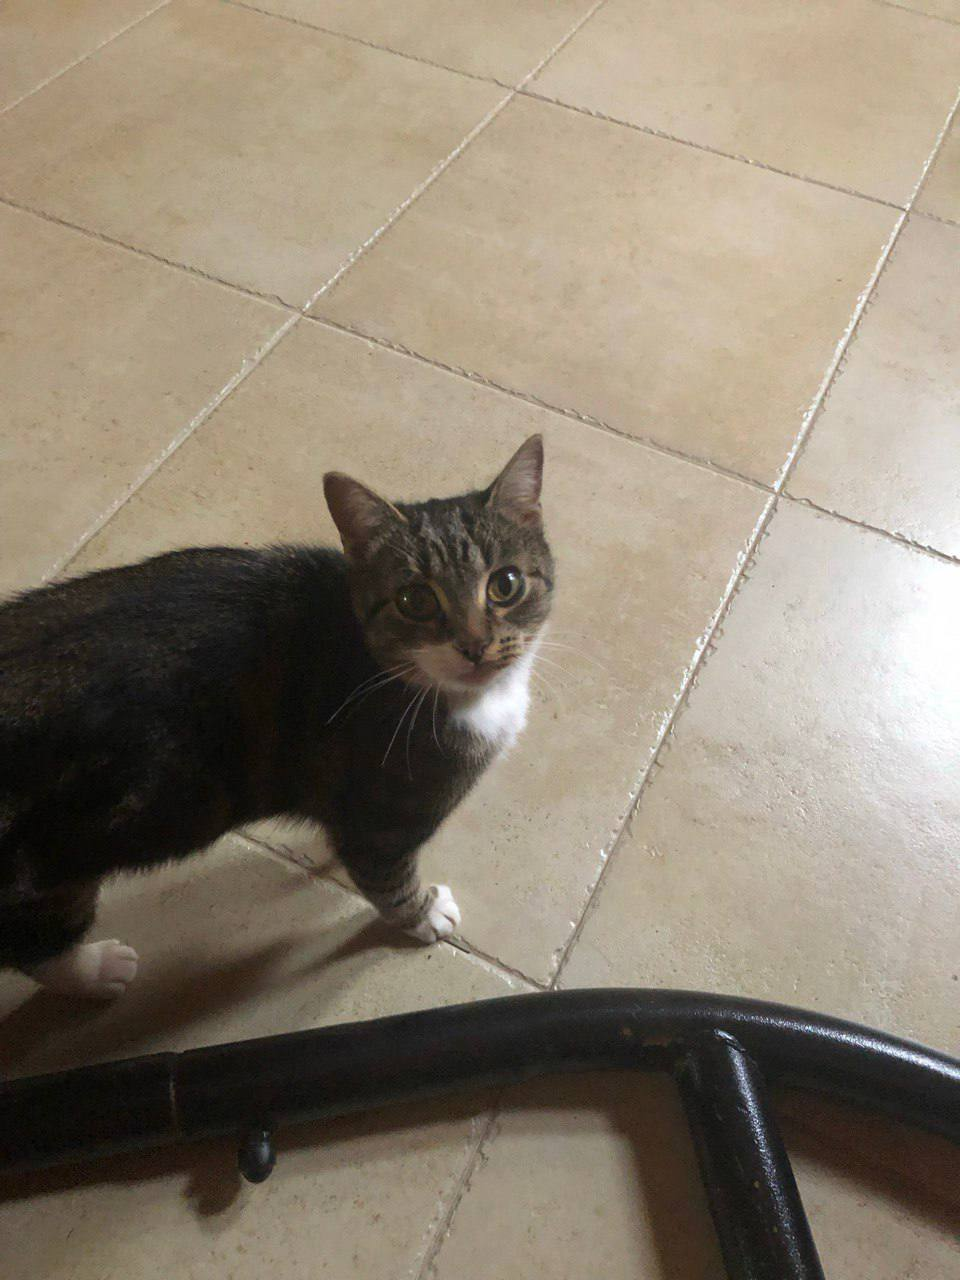

*Сабрины)*